<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/syntheticdatageneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:

Home page:
https://docs.sdv.dev/sdv/

GitHub:
https://github.com/sdv-dev/SDV

Data preparation
https://docs.sdv.dev/sdv/single-table-data/data-preparation/single-table-metadata-api

# Synthetic Data Generation
Synthetic Data Generation refers to the process of generating artificial data that imitates real-world data. This data can be used for a variety of purposes, including training machine learning models, testing software systems, and protecting sensitive data.

The process of Synthetic Data Generation typically involves using algorithms to generate data that has similar statistical properties to real-world data. This can be done by analyzing patterns and correlations in the real data and then using this information to generate new data that follows the same patterns and correlations.

Synthetic Data Generation can be particularly useful in situations where real data is limited, expensive, or sensitive. For example, if you are developing a machine learning model that requires a large amount of data, you may not have access to enough real-world data to train the model effectively. In this case, you could use Synthetic Data Generation to generate additional data that can be used to train the model.

Overall, Synthetic Data Generation is a powerful tool for data scientists and software developers, providing a way to generate data that can be used to train models, test systems, and protect sensitive data, all while minimizing the need for real-world data.

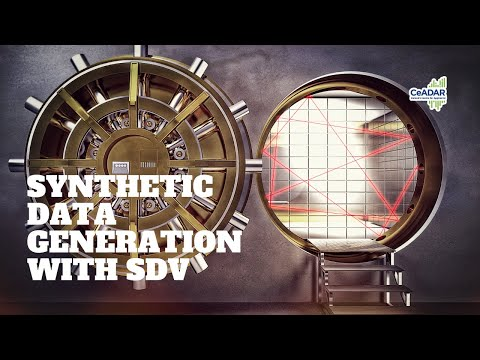

In [1]:
#@title Synthetic Data Generation with SDV
#@markdown This video gives an intriduction to Synthetic Data Generation with SDV
from IPython.display import YouTubeVideo
YouTubeVideo('VD55NmNuhOw', width=600, height=400)

# Synthetic Data Generation for gas process digital twins
Training Machine Learning Models: Synthetic data can be used to train machine learning models that are used in gas process digital twins. Machine learning models can be trained using synthetic data that mimics the behavior of real-world gas processes. This synthetic data can be generated using algorithms that are based on physical models of gas processes or using statistical models that are trained on real-world data.

Testing and Validation: Synthetic data can also be used to test and validate gas process digital twins. By generating synthetic data that simulates different scenarios, you can test how the digital twin responds to different conditions. This can help identify any weaknesses or areas for improvement in the digital twin.

Privacy and Security: Another benefit of synthetic data is that it can be used to protect sensitive data. For example, if you need to share data with third-party vendors or partners, you can use synthetic data instead of real data to protect the privacy and security of the data.

# The Synthetic Data Vault (SDV) is a Python library
The Synthetic Data Vault (SDV) is a Python library designed to be your one-stop shop for creating tabular synthetic data. The SDV uses a variety of machine learning algorithms to learn patterns from your real data and emulate them in synthetic data.

In [2]:
%%capture
!pip install sdv
!pip install wget

IMPORTANT! When this is finished, please restart the runtime by clicking on Runtime, and then Restart runtime in the top menu bar.

# Syntetic data generation is done in four steps:

1. Data preparation
2. Model the data
3. Generate new synthetic data
4. Test and check quality

# 1. Data preparation

https://docs.sdv.dev/sdv/single-table-data/data-preparation

Single table data contains rows and columns of information. Each row typically represents a new entity such as a user, transaction, or session.

Before you begin creating synthetic data, it's important to have your data ready in the right format:

Data, loaded into Python as a pandas DataFrame object, and

Metadata, a SingleTableMetadata object that describes your table. It includes the data types in each column, primary keys and other identifiers.

In [3]:
import wget
url = 'https://raw.githubusercontent.com/EvenSol/NeqSim-Colab/master/notebooks/process/TimeSeries.csv'
filename = wget.download(url)

In [4]:
from sdv.datasets.local import load_data_from_csv
try:
  datasets = load_data_from_csv('./TimeSeries.csv')
except:
  print('error loading data')
datasets

#select row
#datasets = datasets.head(10000)

#select every 10th row
datasets = datasets.iloc[::10, :]

datasets = datasets[abs(datasets['AIT-1x35.PV'].astype('float')) <= 30.0]
datasets = datasets[abs(datasets['AIT-1x34.PV'].astype('float')) <= 30.0]

In [5]:
import pandas as pd
datasets['time'] = pd.to_datetime(datasets['time'], format='%d.%m.%Y %H:%M')
datasets.info()
datasets

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022 entries, 0 to 20450
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FieldName                 2022 non-null   object        
 1   time                      2022 non-null   datetime64[ns]
 2   AIT-1x3x-1x31.T_SEL_N2    2022 non-null   float64       
 3   AIT-1x3x-1x31.T_SEL_CO2   2022 non-null   float64       
 4   AIT-1x3x-1x31.T_SEL_CH4   2022 non-null   float64       
 5   AIT-1x3x-1x31.T_SEL_C2H6  2022 non-null   float64       
 6   AIT-1x3x-1x31.T_SEL_C3H8  2022 non-null   float64       
 7   AIT-1x3x-1x31.T_SEL_iC4   2022 non-null   float64       
 8   AIT-1x3x-1x31.T_SEL_nC4   2022 non-null   float64       
 9   AIT-1x3x-1x31.T_SEL_iC5   2022 non-null   float64       
 10  AIT-1x3x-1x31.T_SEL_nC5   2022 non-null   float64       
 11  STN1x-FT.INUSE2           2022 non-null   float64       
 12  TIC-xx14.          

,FieldName,time,AIT-1x3x-1x31.T_SEL_N2,AIT-1x3x-1x31.T_SEL_CO2,AIT-1x3x-1x31.T_SEL_CH4,AIT-1x3x-1x31.T_SEL_C2H6,AIT-1x3x-1x31.T_SEL_C3H8,AIT-1x3x-1x31.T_SEL_iC4,AIT-1x3x-1x31.T_SEL_nC4,AIT-1x3x-1x31.T_SEL_iC5,...,TI-1x21.,TI-1xx2..1,TIC-1x22.,TIC-1xxx.,TI-1x16..1,TI-1x18.,HLD_76-TIC-xx26..1,AIT-1x34.PV,AIT-1x35.PV,TIT-1x23.
0,Obelix,2021-09-01 08:00:00,0.468340,2.070297,92.821587,2.610040,1.023371,0.163583,0.323916,0.102719,...,35.351543,84.759247,50.692177,45.893333,73.513145,17.553648,15.116081,2.636068,2.210769,50.265503
10,Obelix,2021-09-01 13:00:00,0.361451,2.787648,88.022316,4.826467,2.235179,0.311283,0.684066,0.179235,...,32.289890,78.738266,50.325794,46.922386,75.474754,17.430105,14.712008,2.988814,2.990104,50.574432
20,Obelix,2021-09-01 18:00:00,0.395576,2.755058,87.427277,5.175328,2.451495,0.328711,0.723730,0.179118,...,32.853077,75.663651,50.063046,46.831432,75.153992,17.342215,15.023537,2.215657,2.702277,49.580002
30,Obelix,2021-09-01 23:00:00,0.393321,2.693820,87.846329,4.993552,2.340487,0.313335,0.686931,0.170744,...,33.916084,75.847656,50.283028,46.929249,75.236404,17.254267,15.048112,2.865366,2.966082,50.166496
40,Obelix,2021-09-02 04:00:00,0.406037,2.646897,87.934303,4.951840,2.333584,0.312470,0.688221,0.171727,...,33.422455,75.929665,50.262531,46.968594,75.387650,17.247114,14.994543,3.390790,2.777592,49.973000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20410,Obelix,2022-10-31 12:00:00,0.305144,3.187121,87.833710,4.888451,2.145141,0.295791,0.624672,0.164486,...,18.692556,79.202332,34.422756,55.997471,93.066818,18.648378,15.481638,3.064084,2.657821,34.266651
20420,Obelix,2022-10-31 17:00:00,0.309401,3.186856,87.857773,4.882586,2.136240,0.293898,0.620390,0.163509,...,18.671041,79.204803,34.390614,55.827015,92.789215,18.634056,15.495810,3.254827,2.476534,34.322605
20430,Obelix,2022-10-31 22:00:00,0.303939,3.186333,87.864456,4.883812,2.136242,0.293853,0.619766,0.163135,...,18.654175,78.471252,33.923386,55.505390,92.271980,18.604101,15.489460,3.235240,2.702497,33.945690
20440,Obelix,2022-11-01 03:00:00,0.296326,3.194042,87.863197,4.884551,2.136691,0.294032,0.619722,0.162938,...,18.661369,79.233482,34.744446,55.140598,91.845879,18.573833,15.471596,3.916811,3.085670,34.614498


<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



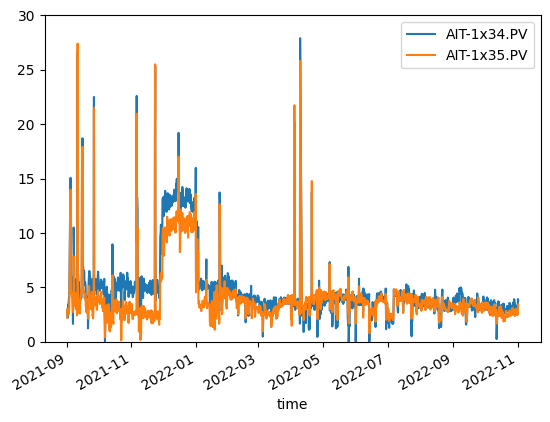

In [6]:
import matplotlib.pyplot as plt

ax = datasets.plot(kind = 'line', x = 'time', y = ['AIT-1x34.PV', 'AIT-1x35.PV'])
ax.set_ylim(0,30)
plt.show()

#What is sequential data?
A sequence is a set of measurements taken in a particular order, such as the Open, Close and Volume of stock prices. Some datasets have a sequence index that prescribes this order. In our case, the time column.

In [7]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=datasets)

metadata.update_column(
    column_name='FieldName',
    sdtype='id',
    regex_format='[A-Z]{4}'
)

metadata.update_column(
    column_name='time',
    sdtype='datetime',
    datetime_format='%Y-%m-%d %H:%M:%S'
)

metadata.set_sequence_key('FieldName')
metadata.set_sequence_index('time')


In [8]:
metadata.validate()

#2 and 3. Model the data and generate new synthetic data

The SDV creates synthetic data using machine learning. A synthesizer is an object that you can use to accomplish this task.

You'll start by creating a synthesizer based on your metadata

Next, you'll train the synthesizer using real data. In this phase, the synthesizer will learn patterns from the real data.

Once your synthesizer is trained, you can use it to generate new, synthetic data.

An SDV synthesizer is an object that you can use to create synthetic data. It learns patterns from the real data and replicates them to generate synthetic data.

# PAR method
The PARSynthesizer uses a deep learning methods to train a model and generate synthetic data.

https://docs.sdv.dev/sdv/sequential-data/modeling/parsynthesizer

In [9]:
from sdv.sequential import PARSynthesizer

synthesizer = PARSynthesizer(metadata,epochs=150)
synthesizer.fit(datasets)

synthesizer.save(
    filepath='PARmethod.pkl'
)

In [10]:
#Load model

synthesizer = PARSynthesizer.load(
    filepath='PARmethod.pkl'
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Generate data
synthetic_data = synthesizer.sample(num_sequences=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## View generated data set

In [12]:
synthetic_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,FieldName,time,AIT-1x3x-1x31.T_SEL_N2,AIT-1x3x-1x31.T_SEL_CO2,AIT-1x3x-1x31.T_SEL_CH4,AIT-1x3x-1x31.T_SEL_C2H6,AIT-1x3x-1x31.T_SEL_C3H8,AIT-1x3x-1x31.T_SEL_iC4,AIT-1x3x-1x31.T_SEL_nC4,AIT-1x3x-1x31.T_SEL_iC5,...,TI-1x21.,TI-1xx2..1,TIC-1x22.,TIC-1xxx.,TI-1x16..1,TI-1x18.,HLD_76-TIC-xx26..1,AIT-1x34.PV,AIT-1x35.PV,TIT-1x23.
0,AAAA,2021-09-01 07:59:59,0.282487,3.361853,87.241227,4.755947,2.002379,0.287820,0.618478,0.164086,...,21.917058,83.290338,32.273827,48.509940,80.485075,16.626786,15.249588,6.026969,4.061774,38.560912
1,AAAA,2021-09-01 13:20:23,0.238535,2.999717,87.973849,4.924386,1.894566,0.320693,0.674743,0.177201,...,23.211734,83.290338,34.686128,48.671490,80.485075,17.935245,15.249588,2.602821,2.233072,39.814852
2,AAAA,2021-09-01 17:41:02,0.351335,2.607356,88.132951,4.862188,2.208606,0.303765,0.612984,0.164086,...,18.666855,84.657902,37.135293,49.328499,83.418265,17.851269,13.875640,1.342718,4.061774,40.654268
3,AAAA,2021-09-01 22:44:34,0.306259,3.093214,87.265155,4.901401,1.411703,0.290609,0.634259,0.131620,...,27.986316,72.950601,42.275068,49.327229,76.972788,17.851729,15.032897,7.025937,1.695500,38.790937
4,AAAA,2021-09-02 02:59:47,0.292170,2.642778,88.793343,4.919901,1.824608,0.303749,0.634259,0.160990,...,27.079508,83.290338,37.742796,49.177214,77.279910,17.851729,14.580205,3.247742,4.404817,36.241710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,AAAA,2022-10-27 15:52:29,0.292904,2.542719,88.327230,4.053956,1.963973,0.294767,0.606484,0.158912,...,24.364275,86.454007,35.502104,47.694870,77.237373,18.102392,15.026327,5.551942,1.266953,42.397519
2018,AAAA,2022-10-27 20:42:04,0.361395,3.150259,88.967538,4.718640,2.486442,0.293699,0.638662,0.158625,...,29.720570,89.604458,43.913097,49.177214,76.585899,17.140684,15.097378,6.414900,1.634225,45.718722
2019,AAAA,2022-10-28 01:46:32,0.298527,3.144810,88.671263,4.200613,1.687791,0.319146,0.577943,0.156609,...,26.832379,86.663457,38.682237,47.764850,78.708888,17.810122,14.946562,6.185651,2.080290,41.702752
2020,AAAA,2022-10-28 06:47:47,0.270874,2.906588,87.231652,4.770902,2.196554,0.293939,0.599836,0.162676,...,25.988482,81.818244,40.254614,49.293519,79.903442,18.234158,15.602587,5.066626,3.007144,40.380891


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


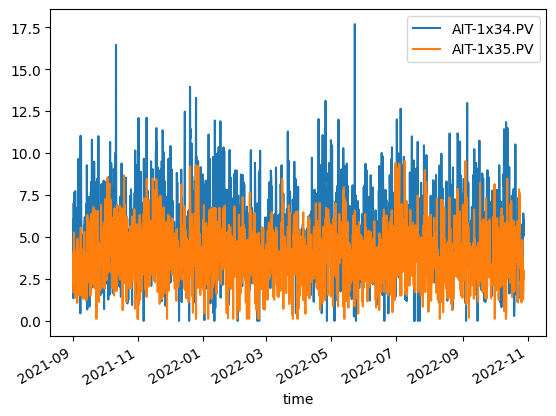

In [13]:
import matplotlib.pyplot as plt

ax = synthetic_data.plot(kind = 'line', x = 'time', y = ['AIT-1x34.PV', 'AIT-1x35.PV'])
#ax.set_ylim(0,30)
plt.show()

# 4. Test and check quality

This object computes an overall quality score on a scale of 0 to 100% (100 being the best) as well as detailed breakdowns. For more insights, you can also visualize the synthetic vs. real data.

In [14]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    datasets,
    synthetic_data,
    metadata)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:


Overall Quality Score: 78.0%

Properties:
Column Shapes: 67.01%
Column Pair Trends: 89.0%


In [15]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=datasets,
    synthetic_data=synthetic_data,
    column_name='AIT-1x34.PV',
    metadata=metadata
)
    
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

# Simulate senarios

https://docs.sdv.dev/sdv/single-table-data/sampling#simulate-scenarios

In the below exmaple we sample with a condition that it is 2ppm from water analyser.

In [16]:
from sdv.sampling import Condition

highWaterContent = Condition(
    num_rows=250,
    column_values={'AIT-1x34.PV': 2.0}
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/sdv/sequential/par.py:127: UserWarning:

The PARSynthesizer does not yet support constraints. This model will ignore any constraints in the metadata.



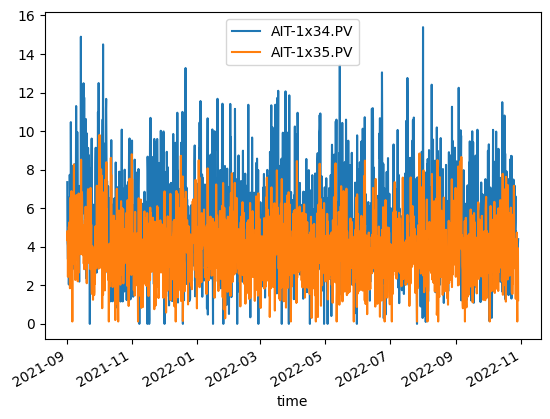

In [33]:
positive_constraint = {
            'constraint_class': 'Positive',
            'table_name': 'synthetic_data',
            'constraint_parameters': {
                'column_name': 'AIT-1134xyzP',
                'strict_boundaries': True
            }
        }

synthesizer.add_constraints(constraints= positive_constraint)
synthetic_data_restricted = synthesizer.sample(num_sequences=1)

import matplotlib.pyplot as plt

synthetic_data_restricted.plot(kind = 'line', x = 'time', y = ['AIT-1x34.PV', 'AIT-1x35.PV'])

plt.show()


# Use data as input to a NeqSim process simulation model



In [32]:
%%capture
%pip install neqsim==2.5.35

In [25]:
data = synthetic_data.iloc[1]
print(data['STN1x-FT.INUSE2'])

259.45548759025894


In [22]:
#Input parameters
inputData = {
  "feedGasFlowRate": 11.23,
  "feedGasTemperature": 30.4,
  "feedGasPressure": 51.2+1.01325,
  "absorberFeedGasTemperature": 30.4,
  "absorberFeedGasPressure": 51.2+1.01325,
  "leanTEGFlowRate": data['FIT-1xx2.']*1.1, #kg/hr
  "leanTEGTemperature": 43.6,
  "flashDrumPressure": 3.9+1.01325,
  "reboilerPressure": 0.23+1.10325,
  "condenserTemperature": 100.0,
  "condenserPressure":  0.23+1.10325,
  "reboilerTemperature": 206.6,
  "strippingGasRate": 91.2, #check unit?
  "strippingGasFeedTemperature": 206.6,
  "regenerationGasCoolerTemperature": 37.5,
  "TEGpumpIsentropicEfficiency": 0.75,
  'finefilterdeltaP': 0.01,
  'carbonfilterdeltaP': 0.01,
  "numberOfEquilibriumStagesTEGabsorber": 3,
  "stageEfficiencyTEGabsorber": 1.0,
  "stageEfficiencyStripper": 1.0,
  "numberOfEquilibriumStagesStripper": 3,
  "UAvalueLeanRichTEGHeatExchanger": 23000.0
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [27]:
# download neqsim model (use xml..)
from neqsim.thermo import fluid, printFrame
from neqsim.process import getProcess, clearProcess, mixer, heater, stream, pump, separator, runProcess, stream, saturator, valve, filters, heatExchanger, simpleTEGAbsorber,distillationColumn, waterStripperColumn, recycle2, setpoint, calculator

clearProcess()

# Start by creating a fluid in neqsim
feedGas = fluid("cpa")  # create a fluid using the SRK-Eo
feedGas.addComponent("nitrogen", 1.03)
feedGas.addComponent("CO2", 1.42)
feedGas.addComponent("methane", 83.88)
feedGas.addComponent("ethane", 8.07)
feedGas.addComponent("propane", 3.54)
feedGas.addComponent("i-butane", 0.54)
feedGas.addComponent("n-butane", 0.84)
feedGas.addComponent("n-pentane", 0.19)
feedGas.addComponent("i-pentane", 0.21)
feedGas.addComponent("n-hexane", 0.28)
feedGas.addComponent("water", 0.0)
feedGas.addComponent("TEG", 0.0)
feedGas.setMixingRule(10)

dryFeedGas = stream(feedGas)
dryFeedGas.setName('dry feed gas')
dryFeedGas.setFlowRate(inputData['feedGasFlowRate'], 'MSm3/day')
dryFeedGas.setTemperature(inputData['feedGasTemperature'], 'C')
dryFeedGas.setPressure(inputData['feedGasPressure'], 'bara')

saturatedFeedGas = saturator(dryFeedGas)
saturatedFeedGas.setName("water saturator")

waterSaturatedFeedGas = stream(saturatedFeedGas.getOutStream())
waterSaturatedFeedGas.setName("water saturated feed gas")

feedTEG = feedGas.clone()
feedTEG.setMolarComposition([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.015, 0.985])

feedTPsetterToAbsorber = heater(waterSaturatedFeedGas)
feedTPsetterToAbsorber.setName('TP of gas to absorber')
feedTPsetterToAbsorber.setOutPressure(inputData['absorberFeedGasPressure'], "bara")
feedTPsetterToAbsorber.setOutTemperature(inputData['absorberFeedGasTemperature'], "C")

feedToAbsorber = stream(feedTPsetterToAbsorber.getOutStream())
feedToAbsorber.setName("feed to TEG absorber")

TEGFeed = stream(feedTEG)
TEGFeed.setName('lean TEG to absorber')
TEGFeed.setFlowRate(inputData['leanTEGFlowRate'], 'kg/hr')
TEGFeed.setTemperature(inputData['leanTEGTemperature'], 'C')
TEGFeed.setPressure(inputData['absorberFeedGasPressure'], 'bara')

absorber = simpleTEGAbsorber()
absorber.setName("TEG absorber")
absorber.addGasInStream(feedToAbsorber)
absorber.addSolventInStream(TEGFeed)
absorber.setNumberOfStages(inputData['numberOfEquilibriumStagesTEGabsorber'])
absorber.setStageEfficiency(inputData['stageEfficiencyTEGabsorber'])
absorber.setInternalDiameter(1.7)

dehydratedGas = stream(absorber.getGasOutStream())
dehydratedGas.setName('dry gas from absorber')

richTEG = stream(absorber.getSolventOutStream())
richTEG.setName("rich TEG from absorber")

glycol_flash_valve = valve(richTEG)
glycol_flash_valve.setName("Rich TEG HP flash valve")
glycol_flash_valve.setOutletPressure(inputData['flashDrumPressure'])

richGLycolHeaterCondenser = heater(glycol_flash_valve.getOutStream())
richGLycolHeaterCondenser.setName("rich TEG preheater")


flashSep = separator(richGLycolHeaterCondenser.getOutStream())
flashSep.setName("degasing separator")

flashGas = stream(flashSep.getGasOutStream())
flashGas.setName("gas from degasing separator")

flashLiquid = stream(flashSep.getLiquidOutStream())
flashLiquid.setName("liquid from degasing separator")

fineFilter = filters(flashLiquid)
fineFilter.setName("TEG fine filter")
fineFilter.setDeltaP(inputData['finefilterdeltaP'], "bara")

heatEx = heatExchanger(fineFilter.getOutStream())
heatEx.setName("lean/rich TEG heat-exchanger")
heatEx.setGuessOutTemperature(273.15 + 130.0)
heatEx.setUAvalue(inputData['UAvalueLeanRichTEGHeatExchanger'])

glycol_flash_valve2 = valve(heatEx.getOutStream(0))
glycol_flash_valve2.setName("Rich TEG LP flash valve")
glycol_flash_valve2.setOutletPressure(inputData['reboilerPressure'])

stripGas = feedGas.clone()

strippingGas = stream(stripGas)
strippingGas.setName('stripGas')
strippingGas.setFlowRate(inputData['strippingGasRate'], "Sm3/hr")
strippingGas.setTemperature(inputData['strippingGasFeedTemperature'], "C")
strippingGas.setPressure(inputData['reboilerPressure'], "bara")

gasToReboiler = strippingGas.clone()
gasToReboiler.setName("gas to reboiler")

column = distillationColumn(1, True, True)
column.setName("TEG regeneration column")
column.addFeedStream(glycol_flash_valve2.getOutStream(), 0)
column.getReboiler().setOutTemperature(273.15 + inputData['reboilerTemperature'])
column.getCondenser().setOutTemperature(273.15 + inputData['condenserTemperature'])
column.getReboiler().addStream(gasToReboiler)
column.setTopPressure(inputData['condenserPressure'])
column.setBottomPressure(inputData['reboilerPressure'])

coolerRegenGas = heater(column.getGasOutStream())
coolerRegenGas.setName("regen gas cooler")
coolerRegenGas.setOutTemperature(273.15 + inputData['regenerationGasCoolerTemperature'])

sepregenGas = separator(coolerRegenGas.getOutStream())
sepregenGas.setName("regen gas separator");

gasToFlare = stream(sepregenGas.getGasOutStream())
gasToFlare.setName("gas to flare");

liquidToTrreatment = stream(sepregenGas.getLiquidOutStream())
liquidToTrreatment.setName("water to treatment")

stripper = waterStripperColumn("TEG stripper")
stripper.addSolventInStream(column.getLiquidOutStream())
stripper.addGasInStream(strippingGas)
stripper.setNumberOfStages(inputData['numberOfEquilibriumStagesStripper'])
stripper.setStageEfficiency(inputData['stageEfficiencyStripper'])

recycleGasFromStripper = recycle2("stripping gas recirc")
recycleGasFromStripper.addStream(stripper.getGasOutStream())
recycleGasFromStripper.setOutletStream(gasToReboiler)

heatEx.setFeedStream(1, stripper.getSolventOutStream())

coolerhOTteg3 = heater(heatEx.getOutStream(1))
coolerhOTteg3.setName("lean TEG cooler")
coolerhOTteg3.setOutTemperature(273.15 + inputData['leanTEGTemperature'])

hotLeanTEGPump2 = pump(coolerhOTteg3.getOutStream(), inputData['absorberFeedGasPressure'], "lean TEG HP pump")
hotLeanTEGPump2.setName("lean TEG HP pump")
hotLeanTEGPump2.setOutletPressure(inputData['absorberFeedGasPressure'])
hotLeanTEGPump2.setIsentropicEfficiency(inputData['TEGpumpIsentropicEfficiency'])

pumpHPPresSet = setpoint("HP pump set", hotLeanTEGPump2, "pressure", feedToAbsorber)

leanTEGtoabs = stream(hotLeanTEGPump2.getOutStream())
leanTEGtoabs.setName("lean TEG to absorber")

pureTEG = feedGas.clone()
pureTEG.setMolarComposition([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

makeupTEG = stream(pureTEG)
makeupTEG.setName("makeup TEG")
makeupTEG.setFlowRate(1e-6, "kg/hr")
makeupTEG.setTemperature(inputData['leanTEGTemperature'], "C")
makeupTEG.setPressure(inputData['absorberFeedGasPressure'], "bara")

makeupCalculator = calculator("TEG makeup calculator")
makeupCalculator.addInputVariable(dehydratedGas)
makeupCalculator.addInputVariable(flashGas)
makeupCalculator.addInputVariable(gasToFlare)
makeupCalculator.addInputVariable(liquidToTrreatment)
makeupCalculator.setOutputVariable(makeupTEG)

makeupMixer = mixer("makeup mixer")
makeupMixer.addStream(leanTEGtoabs)
makeupMixer.addStream(makeupTEG)

resycleLeanTEG = recycle2("lean TEG resycle")
resycleLeanTEG.addStream(makeupMixer.getOutStream())
resycleLeanTEG.setOutletStream(TEGFeed)
resycleLeanTEG.setPriority(200)
resycleLeanTEG.setDownstreamProperty("flow rate")

richGLycolHeaterCondenser.setEnergyStream(column.getCondenser().getEnergyStream())

TEGprocess = getProcess()




In [28]:
thread = TEGprocess.run()

In [29]:
wetGasRatekghr = TEGprocess.getUnit("water saturated feed gas").getFlowRate("kg/hr")
waterInWetGasppm = TEGprocess.getUnit("water saturated feed gas").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
waterInDryGasppm = TEGprocess.getUnit("dry gas from absorber").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
waterInWetGaskgMSm3 = waterInWetGasppm*0.01802*101325.0/(8.314*288.15)
waterInDryGaskgMSm3 = waterInDryGasppm*0.01802*101325.0/(8.314*288.15)
waterInWetGaskghr = waterInWetGaskgMSm3*TEGprocess.getUnit("water saturated feed gas").getFlowRate("Sm3/day")/1.0e6/24.0
waterInDryGaskghr = waterInDryGaskgMSm3*TEGprocess.getUnit("dry gas from absorber").getFlowRate("Sm3/day")/1.0e6/24.0
waterInDryGaskgMSm3 = waterInDryGasppm*0.01802*101325.0/(8.314*288.15)
wtLeanTEGFromReboiler = TEGprocess.getUnit("TEG regeneration column").getLiquidOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
wtLeanTEGFromStripper = TEGprocess.getUnit("TEG stripper").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
wtWaterFromStripper = TEGprocess.getUnit("TEG stripper").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("water")*100.0
wtRichTEGFromAbsorber = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
richTEGtemperature = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getTemperature("C")
waterInRichTEGkghr = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("water")*TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getFlowRate("kg/hr")
richTEGtemperatureAfterDepres = TEGprocess.getUnit("Rich TEG HP flash valve").getOutStream().getFluid().getTemperature("C")
RichTEGwtprbinary = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")/(TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")+TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("water"))*100
reboilerdutykW = TEGprocess.getUnit("TEG regeneration column").getReboiler().getDuty()/1.0e3
condenserdutykW = TEGprocess.getUnit("TEG regeneration column").getCondenser().getDuty()/1.0e3
condensertemperature= TEGprocess.getUnit("TEG regeneration column").getCondenser().getTemperature()-273.15
reboilertemperature= TEGprocess.getUnit("TEG regeneration column").getReboiler().getTemperature()-273.15
TEGmakeupkghr = TEGprocess.getUnit("TEG makeup calculator").getOutputVariable().getFluid().getFlowRate("kg/hr")
TEGmakeupkgMSm3 = TEGmakeupkghr/TEGprocess.getUnit("dry feed gas").getFlowRate("Sm3/day")/1.0e6*24
leanTEGflow = TEGprocess.getUnit("TEG absorber").getSolventInStream().getFlowRate("kg/hr")
richTEGflow = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFlowRate("kg/hr")
pump2DutykW = TEGprocess.getUnit("lean TEG HP pump").getEnergy()/1.0e3
flashGasRate = TEGprocess.getUnit("gas from degasing separator").getFlowRate("kg/hr")
gasToFLareRatekghr = TEGprocess.getUnit("gas to flare").getFlowRate("kg/hr")
stripGasRatekghr = TEGprocess.getUnit("stripGas").getFlowRate("kg/hr")
waterToTreatment = TEGprocess.getUnit("water to treatment").getFlowRate("kg/hr")
TEGinwatertoTreatmentwtprecent = TEGprocess.getUnit("water to treatment").getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
flowFromReboiler = TEGprocess.getUnit("TEG regeneration column").getReboiler().getLiquidOutStream().getFlowRate("kg/hr")
richTEGpreheaterDutykW = TEGprocess.getUnit("rich TEG preheater").getDuty()/1000.0
richTEGpreheaterTemperature = TEGprocess.getUnit("rich TEG preheater").getOutStream().getTemperature("C")
richTEGtemperatureOutOfLPflashValve = TEGprocess.getUnit("Rich TEG LP flash valve").getOutStream().getTemperature("C")
#waterInGasFromCondenser= TEGprocess.getUnit("TEG regeneration column").getCondenser().getGasOutStream().getFlowRate("kg/hr")*TEGprocess.getUnit("TEG regeneration column").getCondenser().getGasOutStream().getFluid().getPhase(0).getWtFrac("water")
richTEGtemperatureIntoHX1 = TEGprocess.getUnit("lean/rich TEG heat-exchanger").getOutStream(0).getTemperature("C")
richTEGtemperatureOutHX1 = TEGprocess.getUnit("lean/rich TEG heat-exchanger").getOutStream(0).getTemperature("C")
leanTEGtemperatureintoHX1  = TEGprocess.getUnit("lean/rich TEG heat-exchanger").getOutStream(1).getTemperature("C")   
leanTEGtemperatureoutTEGHX1 =  TEGprocess.getUnit("lean/rich TEG heat-exchanger").getOutStream(1).getTemperature("C")

In [30]:
print('water in dry gas ', waterInDryGasppm, ' ppm (mole)')
print('reboiler duty ', reboilerdutykW, ' kW')

water in dry gas  22.044794065240033  ppm (mole)
reboiler duty  360.7256193200603  kW


# other data technic

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



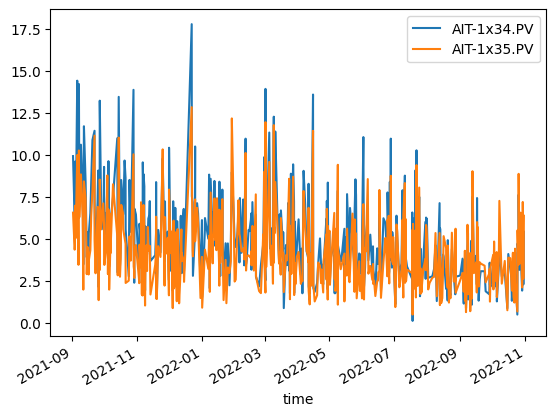

In [31]:
from sdv.metadata import SingleTableMetadata

datasets['ID'] = range(1, len(datasets) + 1)

metadata2 = SingleTableMetadata()
metadata2.detect_from_dataframe(data=datasets)

metadata2.update_column(
    column_name='ID',
    sdtype='id'
)

metadata2.update_column(
    column_name='time',
    sdtype='datetime',
    datetime_format='%Y-%m-%d %H:%M:%S'
)

metadata2.set_sequence_index('time')
metadata2.set_sequence_key('ID')

metadata2.validate()

from sdv.single_table import GaussianCopulaSynthesizer

synthesizer2 = GaussianCopulaSynthesizer(metadata2)
synthesizer2.fit(datasets)

synthetic_data_new = synthesizer2.sample(num_rows=500)
synthetic_data_new.head()

import matplotlib.pyplot as plt

synthetic_data_new.plot(kind = 'line', x = 'time', y = ['AIT-1x34.PV', 'AIT-1x35.PV'])

plt.show()